In [1]:
!pip install pandas matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
def process_df(filepath):
    df = pd.read_csv(filepath)
    
    df['current'] = (df['voltage'] - 2.47) / 0.185
    df['power'] = df['current'] * df['voltage']
    
    return df

In [41]:
df0 = process_df("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data.csv") # initial test
df1 = process_df("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data01.csv") # testing again
df2 = process_df("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data02.csv") # running for 9 minutes
df3 = process_df("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data03.csv") # with the current sesnor connected to nothing at its terminals
df4 = process_df("C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/data/data04.csv") # With Esp32 connested to batteries

print(f"df0: {df0.shape}, df1: {df1.shape}, df2: {df2.shape}")

df0: (336, 4), df1: (182, 4), df2: (10585, 4)


In [10]:
df2.head()

,time,voltage
0,1719683317500671000,1.126537
1,1719683317505016000,1.153930
2,1719683317509461000,1.116869
3,1719683317513771000,1.107201
4,1719683317565958000,1.103978


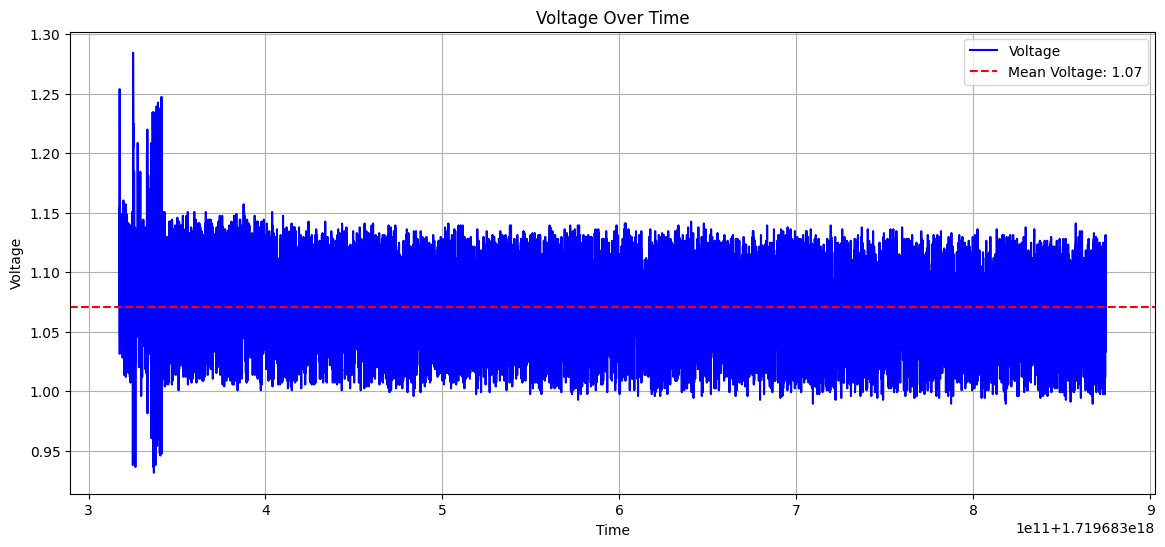

In [42]:
import matplotlib.pyplot as plt

mean_voltage = df2['voltage'].mean()
# Plotting
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df2["time"], df2["voltage"], label='Voltage', color='blue', linestyle='-')
ax.axhline(y=df2['voltage'].mean(),color='red', linestyle='--', linewidth=1.5, label=f'Mean Voltage: {mean_voltage:.2f}' )
# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Voltage')
ax.set_title('Voltage Over Time')

# Enable grid
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [22]:
def plot_voltage_over_time(df, time_col, voltage_col):
    """
    Plots voltage over time and adds a mean voltage line.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    time_col (str): The name of the time column.
    voltage_col (str): The name of the voltage column.
    """
    # Calculate the mean voltage
    mean_voltage = df[voltage_col].mean()
    

    # Plotting
    ax = plt.subplots(figsize=(14, 6))
    ax.plot(df[time_col], df[voltage_col], label='Voltage', color='blue', linestyle='-')

    # Add labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Voltage')
    ax.set_title('Voltage Over Time')

    # Add a horizontal line for the mean voltage
    ax.axhline(y=mean_voltage, color='red', linestyle='--', linewidth=1.5, label=f'Mean Voltage: {mean_voltage:.2f}')
    
    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

In [48]:
def plot_variables(df, time_col, var2):
    
    mean_var2 = df[var2].mean()
    
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(df[time_col], df[var2], label=var2, color='blue')
    
    ax.set_xlabel(time_col)
    ax.set_ylabel(var2)
    ax.set_title(f'{var2} against {time_col}')
    
    ax.axhline(y=mean_var2, color='red', linestyle='--', linewidth=1.5, label=f'Mean {var2}: {mean_var2:.2f}')
    
    ax.legend()
    plt.show()

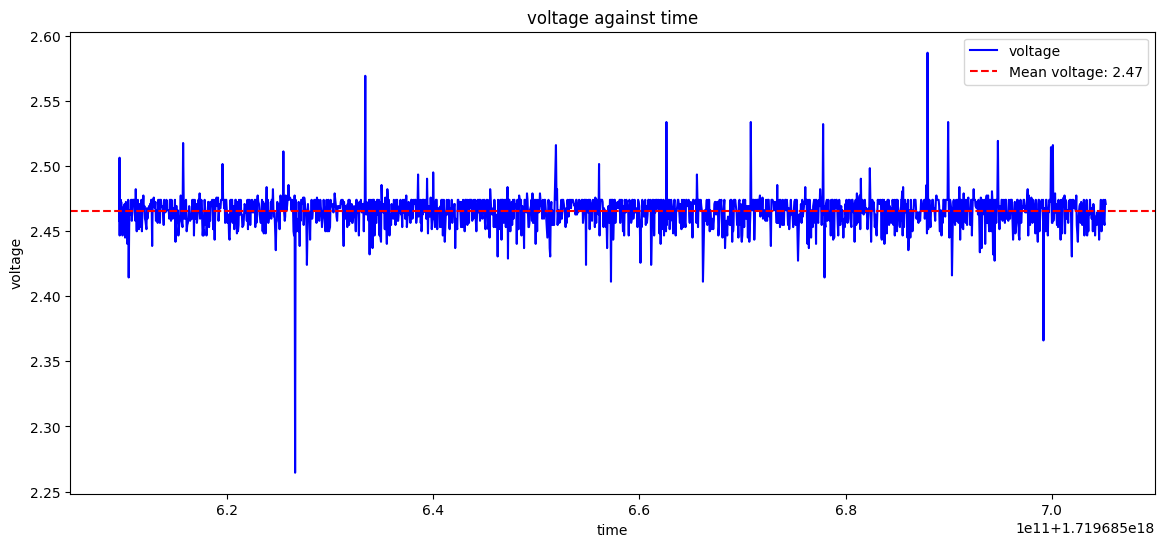

In [47]:
plot_variables(df3, 'time', 'voltage')

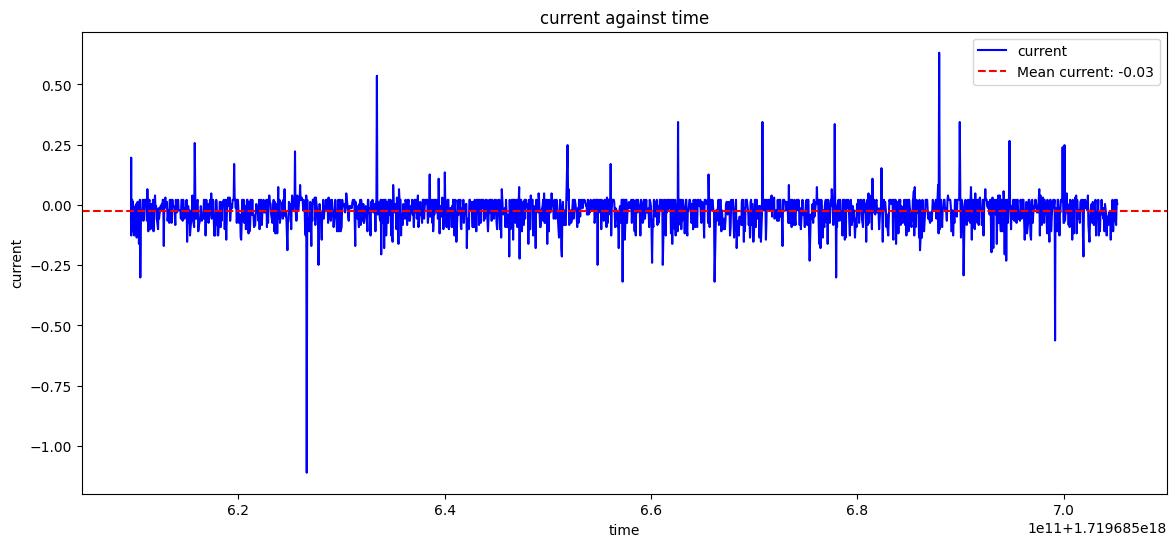

In [49]:
plot_variables(df3, 'time', 'current')

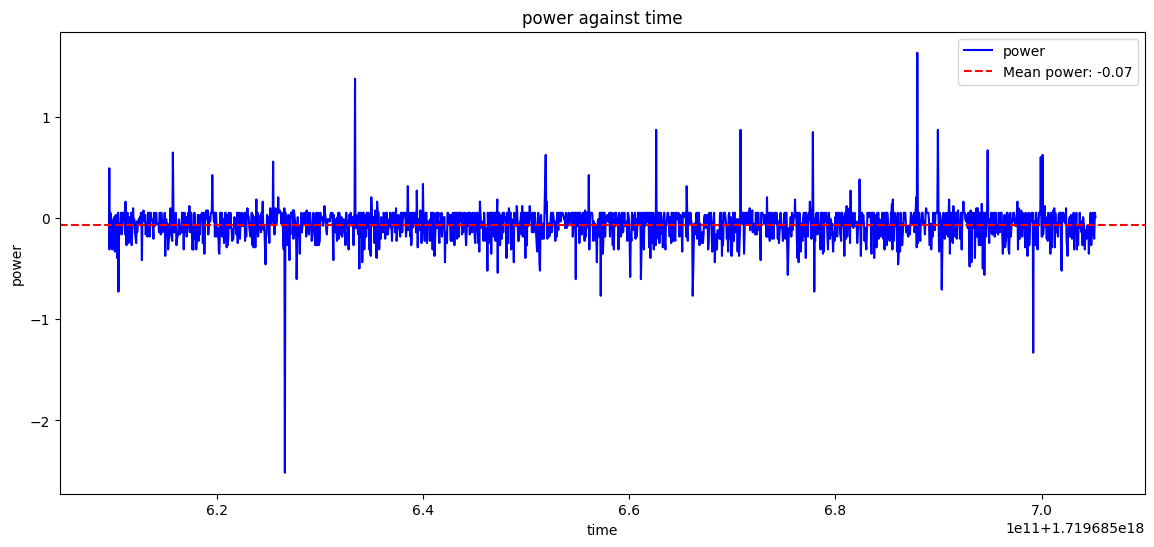

In [50]:
plot_variables(df3, 'time', 'power')

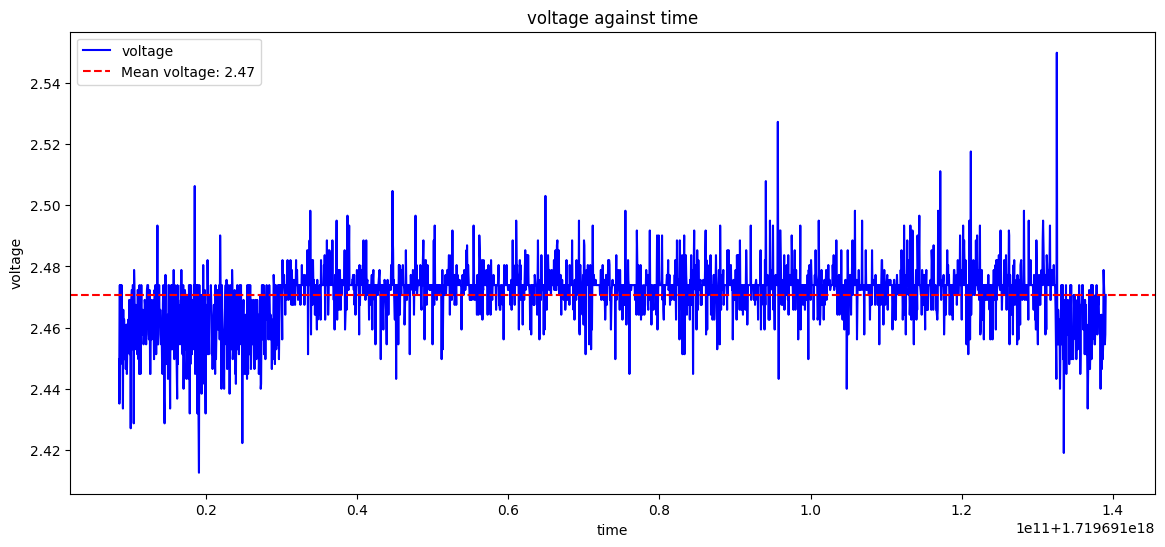

In [51]:
plot_variables(df4, 'time', 'voltage')

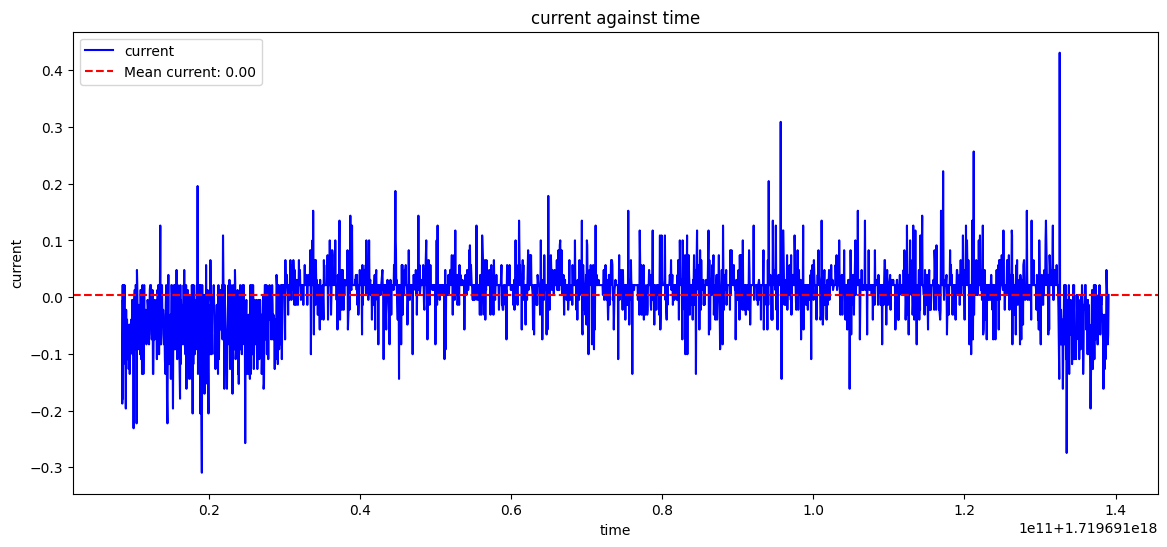

In [52]:
plot_variables(df4, 'time', 'current')

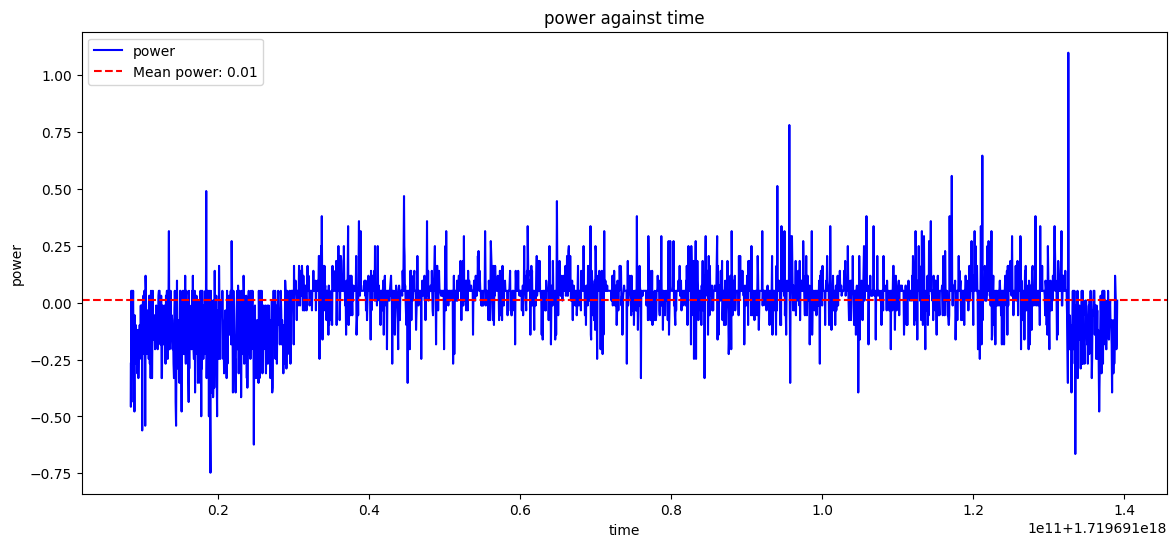

In [53]:
plot_variables(df4, 'time', 'power')